# Description:


The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.<br> <br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Dataset url : https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
dataset = pd.read_csv('diabetes_Dataset.csv')

# Step 1: Descriptive Statistics

In [3]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [5]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Observations:

1.There are a total of 768 records and 9 features in the dataset.<br>
2.Each feature can be either of integer or float dataype.<br>
3.Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.<br>
4.There are zero NaN values in the dataset.<br>
5.In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.<br>

Step 2: Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

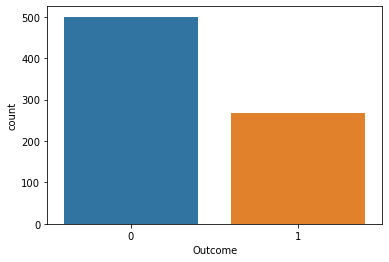

In [8]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

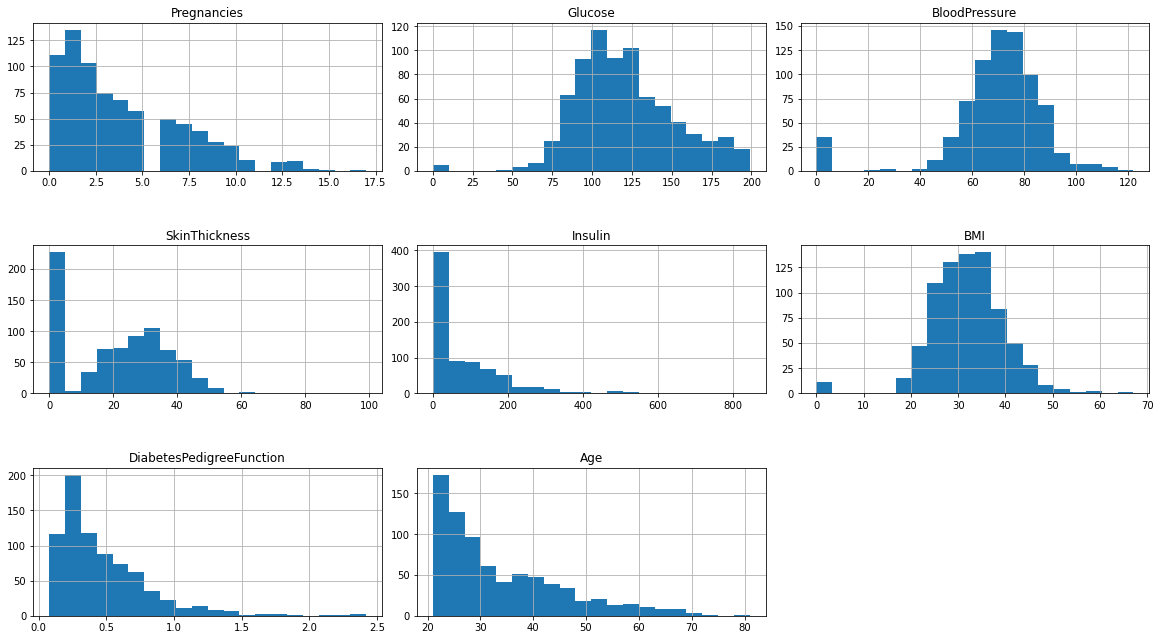

In [9]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int(length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

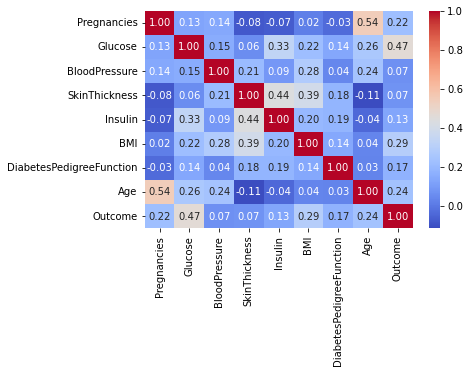

In [10]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True,fmt=".2f",cmap="coolwarm")
plt.show()

# Observations:

1.The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.<br>
2.From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

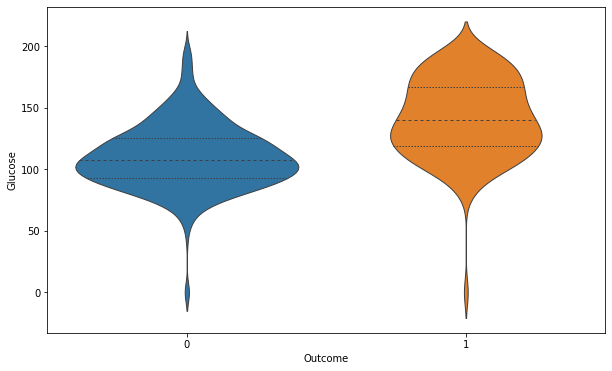

In [11]:
#Glucose Vs Outcome
plt.figure(figsize=(10,6))
sns.violinplot(data=dataset,x="Outcome",y="Glucose",split=True,inner="quart",linewidth=1)


<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

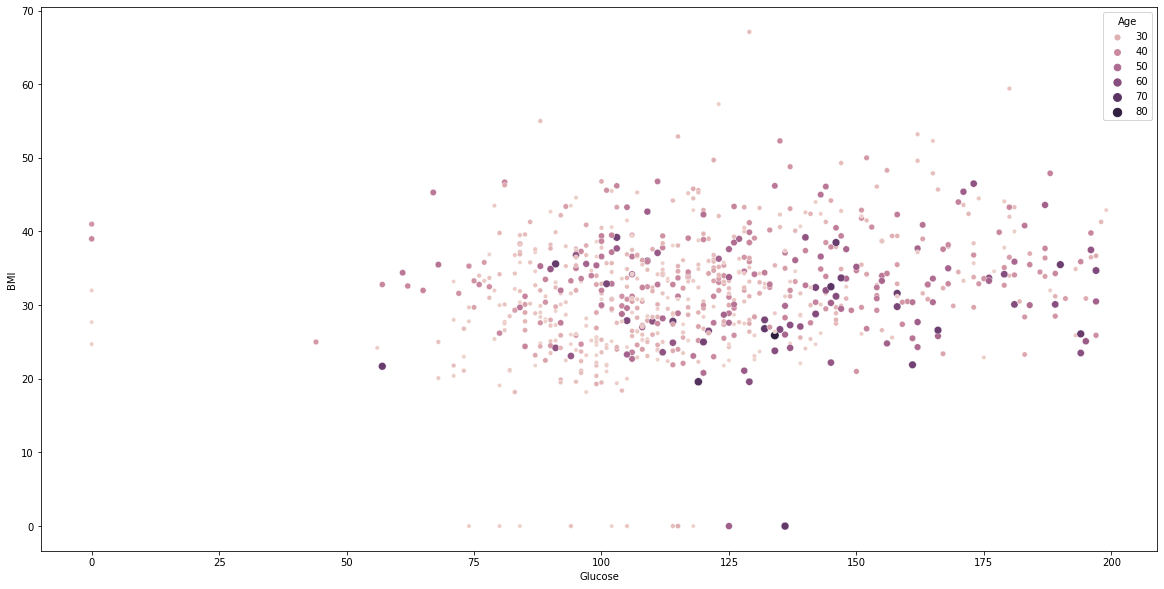

In [12]:
#Glucose Vs BMI Vs Age
plt.figure(figsize=(20,10))
sns.scatterplot(data=dataset,x="Glucose",y="BMI" ,hue="Age",size="Age")

# Step 3: Data Preprocessing

In [13]:
dataset_new = dataset

In [14]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI"]].replace(0,np.nan)

In [15]:
# Count of NaN
dataset_new.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [17]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [18]:
# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [19]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [20]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [21]:
# Splitting X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [22]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


# Step 4: Data Modelling

In [23]:
# Logistic Regression Algorithm
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

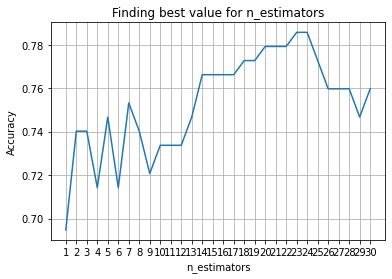

Highest value:  0.7857142857142857


In [24]:
# Plotting a graph for n_neighbors 

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [25]:
# K nearest neighbors Algorithm
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [26]:
# Support Vector Classifier Algorithm
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [27]:
# Decision tree Algorithm
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
# Random forest Algorithm
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [29]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [30]:
# Evaluating using accuracy_score metric
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [31]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Decision tree: 68.18181818181817
Random Forest: 75.97402597402598


In [32]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[87, 13],
       [20, 34]], dtype=int64)

<AxesSubplot:>

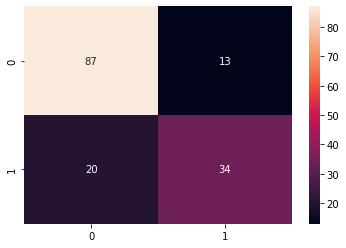

In [33]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [34]:
# Classification report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



# Step 6: Model Deployment

In [36]:
pickle.dump(knn, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))